In [44]:
import torch
import torch.nn as nn
import torch.utils.data
import h5py
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [32]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='2'

In [33]:
# Hyper-parameters
latent_size = 5184
hidden_size = 1728
image_size = 216
num_epochs = 200
batch_size = 128
sample_dir = '/home/nhjeong/MLPGAN/db'

In [34]:
# Generator 
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size))


In [35]:
# Device configuration
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:2" if use_cuda else "cpu")

In [24]:
use_cuda

True

In [25]:
device

device(type='cuda', index=1)

In [36]:
G = torch.load('MLPGAN_aug_noGAN_300epochs_Adam_weight2.pkl')

/home/user/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [37]:
class MyDataset(torch.utils.data.Dataset):
    
    def __init__(self, train=True):
        
        self.train = train
        
        if self.train:
            self.train_X_mat = h5py.File('/home/nhjeong/MLPGAN/db/db4.mat', 'r')
            self.train_X_input = self.train_X_mat['db'][:]


            self.train_Y_mat = h5py.File('/home/nhjeong/MLPGAN/db/gt4.mat', 'r')
            self.train_Y_input = self.train_Y_mat['gt'][:]

            self.train_X_mat.close()
            self.train_Y_mat.close()

        else:
            self.test_X_mat = h5py.File('/home/nhjeong/MLPGAN/db/test_db4.mat', 'r')
            self.test_X_input = self.test_X_mat['test_db'][:]
#             self.test_X_input = np.transpose(self.test_X_input)            

            self.test_Y_mat = h5py.File('/home/nhjeong/MLPGAN/db/test_gt4.mat', 'r')
            self.test_Y_input = self.test_Y_mat['test_gt'][:]
#             self.test_Y_input = np.transpose(self.test_Y_input)            

            self.test_X_mat.close()
            self.test_Y_mat.close()
        
        
        
    def __len__(self):
        if self.train:
            return self.train_X_input.shape[0]
        else:
            return self.test_X_input.shape[0]
    
    def __getitem__(self, index):
        if self.train:
            raw, target = self.train_X_input[index,], self.train_Y_input[index,]
        else:
            raw, target = self.test_X_input[index,], self.test_Y_input[index,]
            
        return raw, target
    
    
    
# trainset = MyDataset(train=True)
testset = MyDataset(train=False)

# trainloader = torch.utils.data.DataLoader(dataset=trainset, batch_size=batch_size, shuffle=True)
# testloader = torch.utils.data.DataLoader(dataset=testset, batch_size=13824, shuffle=False) 

In [38]:

#cudnn.benchmark = True

output = G(torch.tensor(testset.test_X_input).to(device))

In [39]:
test_result = output.cpu().detach().numpy()

In [8]:
sio.savemat('/home/nhjeong/MLPGAN/Test_300epochs_Adam_result2.mat', {'test_result': test_result})

In [40]:
test_result

array([[-0.77061963, -0.7684669 , -0.7685318 , ..., -0.76911616,
        -0.7666981 , -0.7657711 ],
       [-0.7700556 , -0.76737213, -0.768166  , ..., -0.7682815 ,
        -0.76640886, -0.7647573 ],
       [-0.765133  , -0.762592  , -0.7636647 , ..., -0.7633873 ,
        -0.7622575 , -0.7604349 ],
       ...,
       [-0.75725794, -0.754967  , -0.7555541 , ..., -0.75514907,
        -0.75452185, -0.75296164],
       [-0.7466453 , -0.7435649 , -0.74472696, ..., -0.74336594,
        -0.7438882 , -0.74152684],
       [-0.7430268 , -0.7402521 , -0.74129003, ..., -0.73984295,
        -0.7405337 , -0.73842055]], dtype=float32)

In [41]:
test_result.shape

(13824, 216)

In [42]:
testset.test_X_input.shape

(13824, 5184)

([], <a list of 0 Text yticklabel objects>)

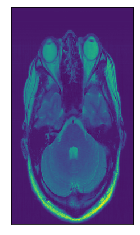

In [47]:
plt.imshow(test_result[0:384,:])
plt.xticks([])
plt.yticks([])

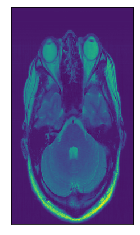

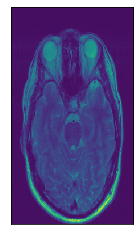

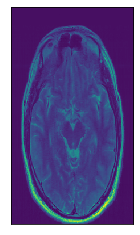

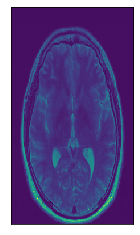

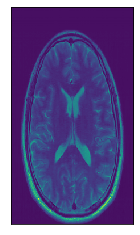

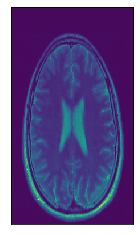

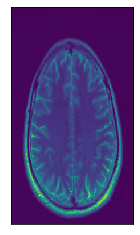

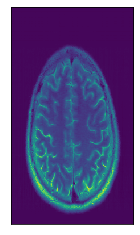

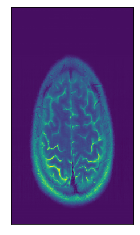

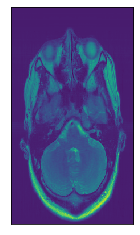

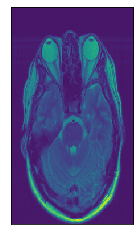

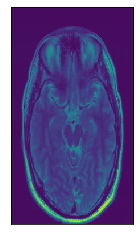

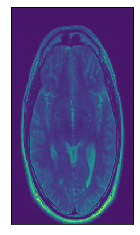

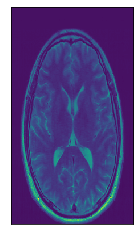

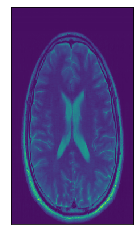

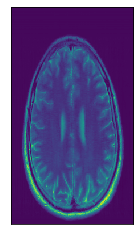

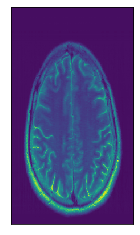

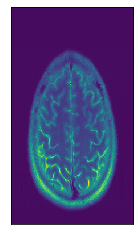

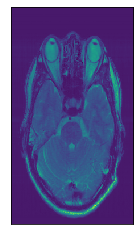

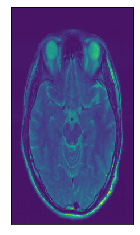

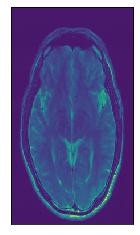

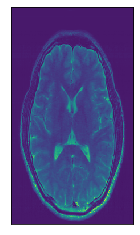

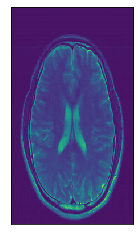

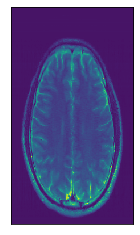

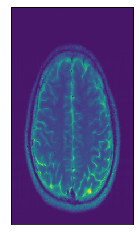

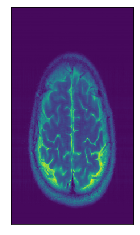

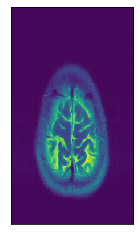

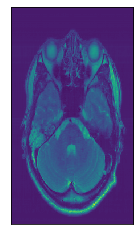

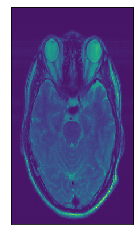

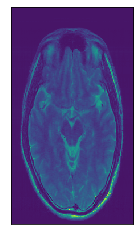

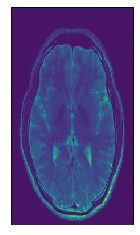

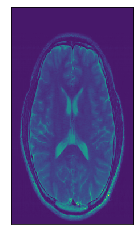

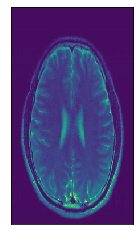

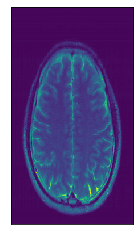

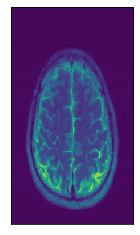

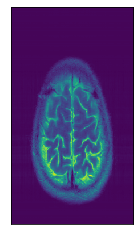

In [48]:
for i in range(36):
    plt.figure()
    plt.imshow(test_result[384*i:384*(i+1),:])
    plt.xticks([])
    plt.yticks([])
    plt.show()

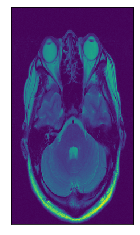

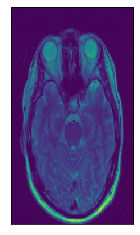

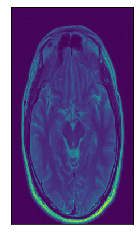

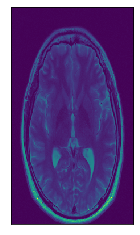

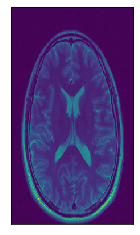

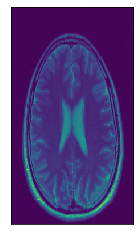

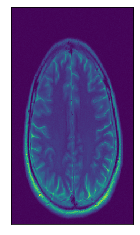

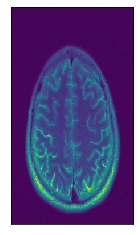

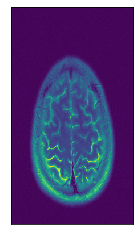

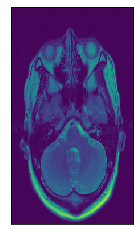

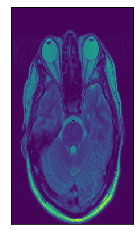

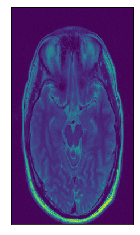

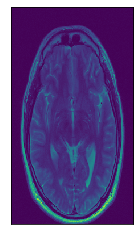

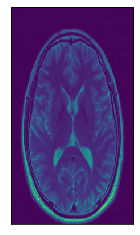

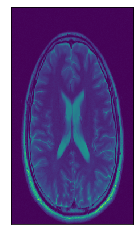

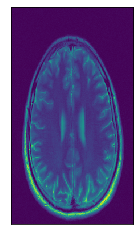

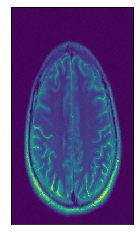

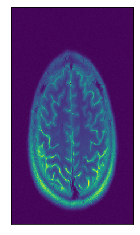

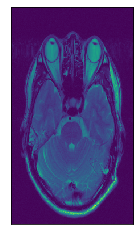

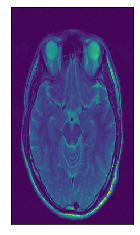

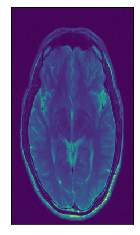

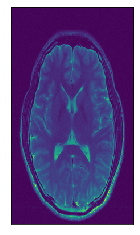

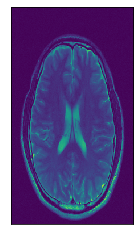

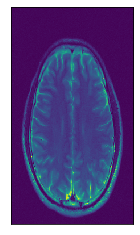

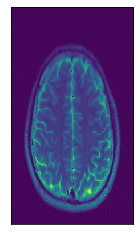

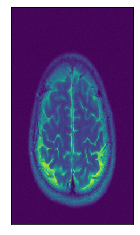

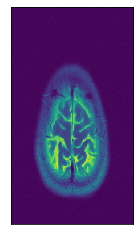

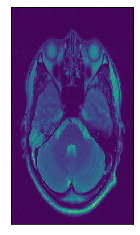

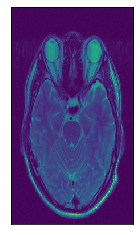

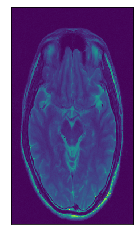

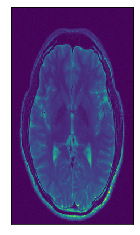

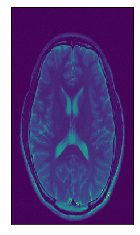

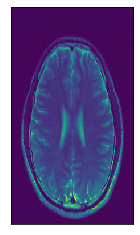

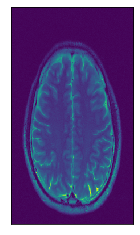

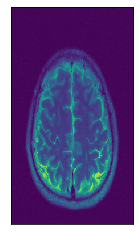

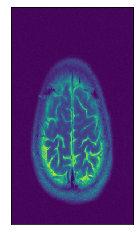

In [49]:
for i in range(36):
    plt.figure()
    plt.imshow(testset.test_Y_input[384*i:384*(i+1),:])
    plt.xticks([])
    plt.yticks([])
    plt.show()

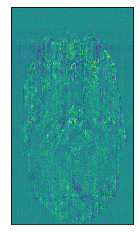

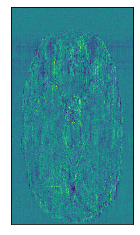

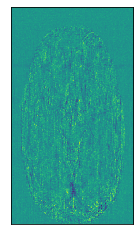

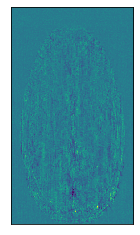

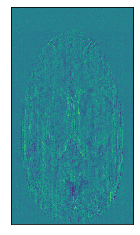

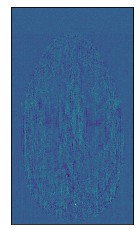

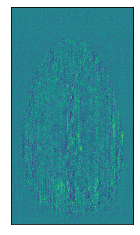

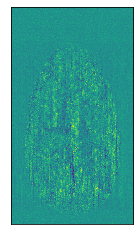

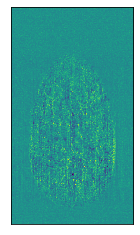

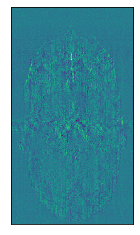

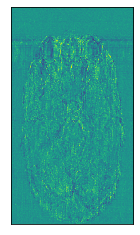

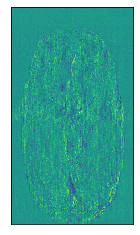

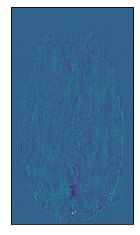

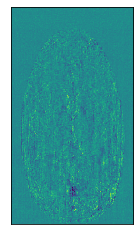

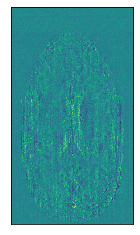

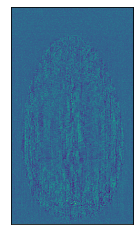

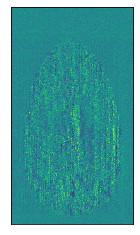

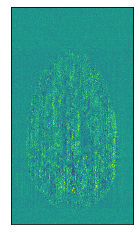

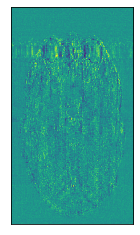

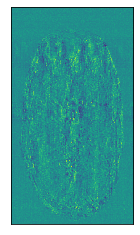

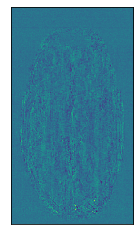

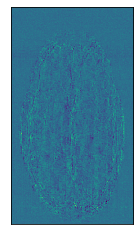

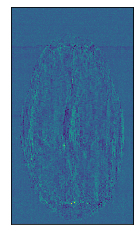

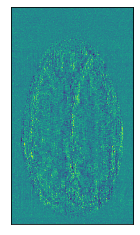

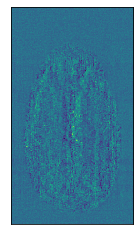

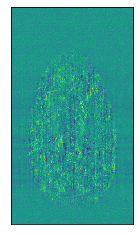

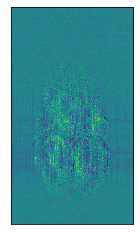

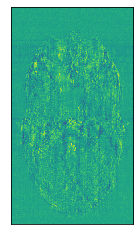

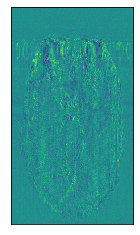

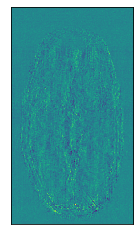

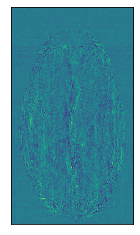

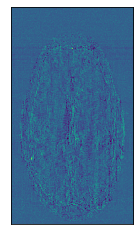

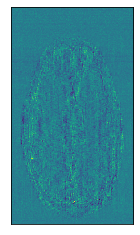

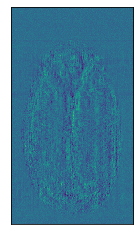

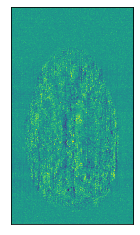

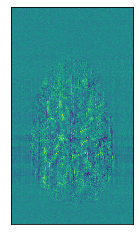

nRMSE: 9.223 %


In [65]:
nrmse = []
for i in range(36):
    ans = testset.test_Y_input[384*i:384*(i+1),:]
    pred = test_result[384*i:384*(i+1),:]
    error = ans - pred
    rmse = (np.sum(error ** 2) / np.sum(ans ** 2)) ** 0.5
    plt.figure()
    plt.imshow(error)
    plt.xticks([])
    plt.yticks([])
    plt.show()    
    nrmse.append(rmse)
print('nRMSE: %.3lf %%' % (np.mean(nrmse)*100))

In [61]:
np.mean(nrmse)

0.09223029058182892